<a href="https://colab.research.google.com/github/AvinandanPatel/APS_Failure_Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Important Libraries
# Data Preprocessing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library to download the stock data
import yfinance as yf

# Time Series Algorithm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Deep Learning Algorithm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## **2. Fetching the Stock Data**

In [ ]:
# Fetch stock data of Apple
tickers = ["AAPL", "MSFT", "GOOGL", "TSLA"]

df = yf.download(tickers, start="2011-01-01", end="2025-01-01")

# Display the first few rows
df.head()

[*********************100%***********************]  4 of 4 completed


Price           Close                                       High             \
Ticker           AAPL      GOOGL       MSFT      TSLA       AAPL      GOOGL   
Date                                                                          
2011-01-03   9.917946  15.069247  21.460409  1.774667   9.938711  15.100167   
2011-01-04   9.969709  15.013641  21.544773  1.778000  10.006122  15.114877   
2011-01-05  10.051263  15.186938  21.475748  1.788667  10.061495  15.218357   
2011-01-06  10.043137  15.297399  22.104671  1.858667  10.088878  15.420326   
2011-01-07  10.115062  15.370706  21.935946  1.882667  10.121983  15.415838   

Price                                  Low                                  \
Ticker           MSFT      TSLA       AAPL      GOOGL       MSFT      TSLA   
Date                                                                         
2011-01-03  21.613808  1.800000   9.775604  14.873012  21.414390  1.726667   
2011-01-04  21.606132  1.796667   9.875215  14.963772  21.360695  1.734667   
2011-01-05  21.483418  1.793333   9.915842  14.962027  21.299340  1.746000   
2011-01-06  22.127682  1.866667  10.018159  15.211374  21.368361  1.787333   
2011-01-07  22.043324  1.905333   9.988066  15.213369  21.667498  1.860000   

Price            Open                                     Volume             \
Ticker           AAPL      GOOGL       MSFT      TSLA       AAPL      GOOGL   
Date                                                                          
2011-01-03   9.799678  14.873012  21.514098  1.789333  445138400   94513392   
2011-01-04  10.004317  15.100913  21.429725  1.777333  309080800   72907020   
2011-01-05   9.917347  14.962526  21.399049  1.765333  255519600  101190708   
2011-01-06  10.072929  15.227083  21.506420  1.788667  300428800   82229688   
2011-01-07  10.050962  15.357491  21.966624  1.866667  311931200   83963952   

Price                           
Ticker          MSFT      TSLA  
Date                            
2011-01-03  53443800  19245000  
2011-01-04  54405600  17811000  
2011-01-05  58998700  21700500  
2011-01-06  88026300  30918000  
2011-01-07  73762000  33718500

## **3. Data Preprocessing**
- Filtering Closing Column
- Handling Missing Values
- Feature Engineering ( Returns, Moving Averages etc)
- Normalization ( if needed for ML
models)

In [ ]:
# Filtering Closing Column
df_close = df["Close"]
df_close.head()

Ticker,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2011-01-03,9.917946,15.069247,21.460409,1.774667
2011-01-04,9.969709,15.013641,21.544773,1.778000
2011-01-05,10.051263,15.186938,21.475748,1.788667
2011-01-06,10.043137,15.297399,22.104671,1.858667
2011-01-07,10.115062,15.370706,21.935946,1.882667


In [ ]:
# Information about the dataset
df_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2011-01-03 to 2024-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3522 non-null   float64
 1   GOOGL   3522 non-null   float64
 2   MSFT    3522 non-null   float64
 3   TSLA    3522 non-null   float64
dtypes: float64(4)
memory usage: 137.6 KB


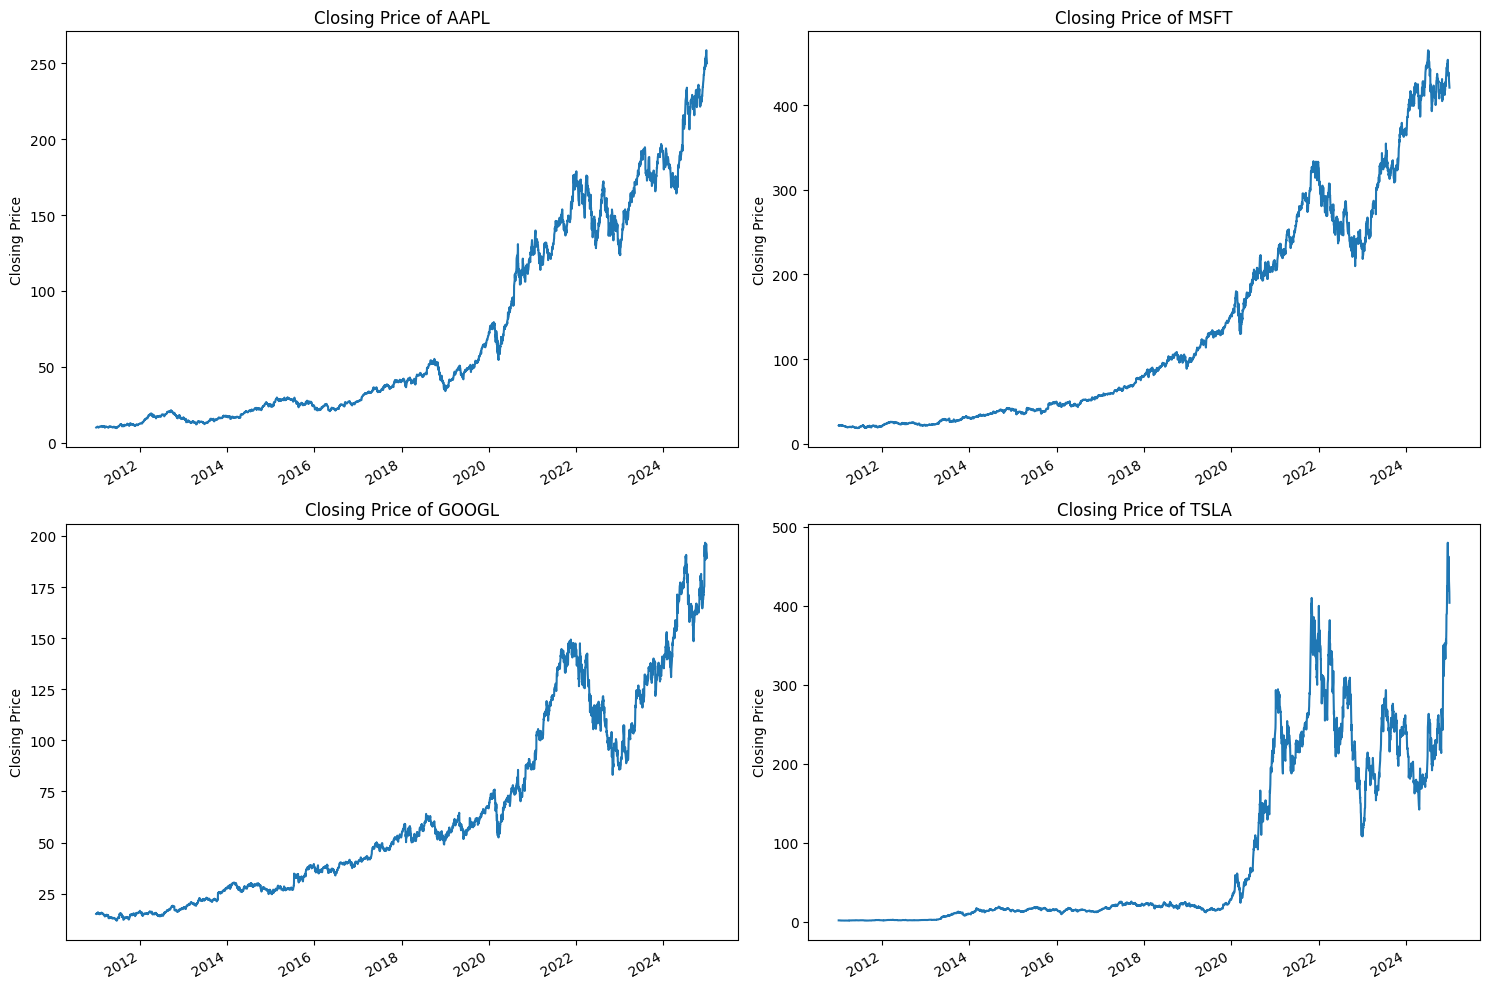

In [ ]:
# Time Series Plot of companies
# Daily time series plot
tickers = ["AAPL", "MSFT", "GOOGL", "TSLA"]
plt.figure(figsize = (15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tickers, 1):
  plt.subplot(2, 2, i)
  df_close[company].plot()
  plt.ylabel('Closing Price')
  plt.xlabel(None)
  plt.title(f"Closing Price of {company}")

plt.tight_layout()

## **4. Understanding & Modelling of Trend and Seasonality**
- For Seasonality, Need to plot **Seasonal Plots**


In [ ]:
df_close["year"] = df_close.index.year
df_close["month"] = df_close.index.month
df_close["day"] = df_close.index.day

<ipython-input-61-e73d8665ae5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close["year"] = df_close.index.year
<ipython-input-61-e73d8665ae5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close["month"] = df_close.index.month
<ipython-input-61-e73d8665ae5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [ ]:
df_close

Ticker,AAPL,GOOGL,MSFT,TSLA,year,month,day
Date,,,,,,,
2011-01-03,9.917946,15.069247,21.460409,1.774667,2011,1,3
2011-01-04,9.969709,15.013641,21.544773,1.778000,2011,1,4
2011-01-05,10.051263,15.186938,21.475748,1.788667,2011,1,5
2011-01-06,10.043137,15.297399,22.104671,1.858667,2011,1,6
2011-01-07,10.115062,15.370706,21.935946,1.882667,2011,1,7
...,...,...,...,...,...,...,...
2024-12-24,257.916443,196.110001,438.450836,462.279999,2024,12,24
2024-12-26,258.735504,195.600006,437.233276,454.130005,2024,12,26
2024-12-27,255.309296,192.759995,429.668457,431.660004,2024,12,27


In [ ]:
df1 = pd.pivot_table(data = df_close, values='AAPL', index='year', columns=['month'], aggfunc='mean')
df1.reset_index(inplace=True)
df1

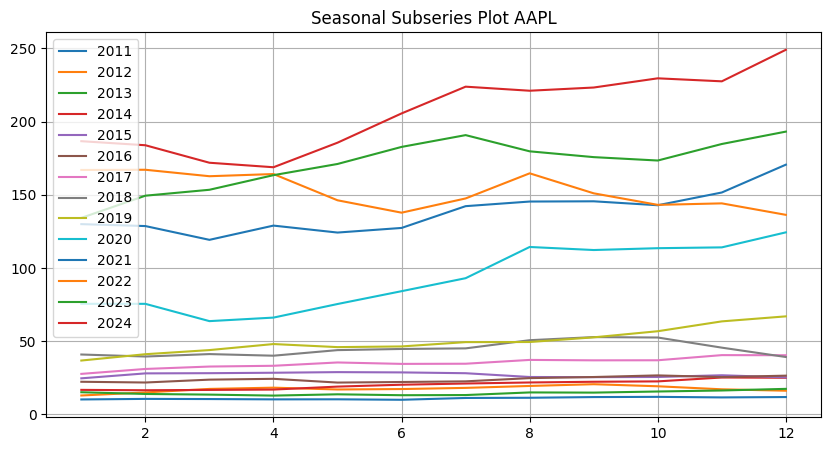

In [ ]:
# Plotting Seasonal Subseries Plot of AAPL
plt.figure(figsize = (10, 5))

for year in df1['year'].unique():
  year_df1 = df1[df1['year']==year]
  plt.plot( year_df1.columns[1:],year_df1.iloc[0, 1:], label = year)

plt.title("Seasonal Subseries Plot AAPL")
plt.legend()
plt.grid(True)
plt.show()